In [1]:
!rm -rf code data_processing logs models code state.db
!rm 1_run_scraper_into_dataset.ipynb 2_finetune_the_detection_model.ipynb 2_finetune_the_detection_model.ipynb requirements.txt

rm: cannot remove '2_finetune_the_detection_model.ipynb': No such file or directory


In [2]:
!git clone -b feat/pretrained-model https://github.com/luthfiarifin/hybrid-envit-car-retrieval.git code
!mv code/* .
!ls

Cloning into 'code'...
remote: Enumerating objects: 189, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 189 (delta 9), reused 26 (delta 6), pack-reused 157 (from 1)
Receiving objects: 100% (189/189), 390.85 MiB | 42.93 MiB/s, done.
Resolving deltas: 100% (68/68), done.
1_run_scraper_into_dataset.ipynb	code		 models
2_finetune_the_detection_model.ipynb	data_processing  requirements.txt
3_train_the_classification_model.ipynb	logs		 yolo_finetune


# Download and Prepare COCO Vehicle Dataset
Before training, we need to download and prepare the COCO vehicle dataset in YOLO format.

In [3]:
!pip install fiftyone

In [4]:
# Import and run the CocoDatasetDownloader class
from data_processing.coco_dataset.download_coco_dataset import CocoDatasetDownloader

coco_vehicle_dataset_path = "data_processing/data/coco_vehicles"

downloader = CocoDatasetDownloader(
    train_samples=2500,
    val_samples=500,
    dataset_dir=coco_vehicle_dataset_path,
)
dataset_dir, classes = downloader.download_and_prepare()


Target classes: ['car']
Dataset will be stored in: data_processing/data/coco_vehicles
Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'
Sufficient images already downloaded
Existing download of split 'train' is sufficient
Loading 'coco-2017' split 'train'
 100% |███████████████| 2500/2500 [18.0s elapsed, 0s remaining, 124.9 samples/s]      
Dataset 'coco-2017-train-2500' created
Training dataset summary:
Name:        coco-2017-train-2500
Media type:  image
Num samples: 2500
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fifty

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'truck' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'stop sign' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'clock' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'train' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'person' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'kite' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.1

   4% |\--------------|   93/2500 [314.9ms elapsed, 8.1s remaining, 295.4 samples/s] 

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'horse' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'potted plant' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'banana' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'cup' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'vase' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'remote' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3

   5% |/--------------|  125/2500 [808.5ms elapsed, 15.4s remaining, 154.6 samples/s] 

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'baseball bat' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'baseball glove' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'boat' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'giraffe' not in provided classes
  warnings.warn(msg)


   8% |█|-------------|  196/2500 [1.1s elapsed, 13.2s remaining, 174.2 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'sheep' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'scissors' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'cow' not in provided classes
  warnings.warn(msg)


  10% |█--------------|  251/2500 [1.3s elapsed, 12.0s remaining, 179.8 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'donut' not in provided classes
  warnings.warn(msg)


  13% |█/-------------|  324/2500 [1.6s elapsed, 10.7s remaining, 241.4 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'bear' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'carrot' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'spoon' not in provided classes
  warnings.warn(msg)


  15% |██\------------|  371/2500 [1.8s elapsed, 10.3s remaining, 242.3 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'cake' not in provided classes
  warnings.warn(msg)


  18% |██-------------|  453/2500 [2.1s elapsed, 9.4s remaining, 248.0 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'snowboard' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'keyboard' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'toilet' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'teddy bear' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'orange' not in provided classes
  warnings.warn(msg)


  21% |███/-----------|  525/2500 [2.5s elapsed, 8.9s remaining, 250.4 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'pizza' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'apple' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'tv' not in provided classes
  warnings.warn(msg)


  24% |███|-----------|  605/2500 [2.8s elapsed, 8.4s remaining, 252.4 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'couch' not in provided classes
  warnings.warn(msg)


  29% |████/----------|  737/2500 [3.3s elapsed, 7.5s remaining, 258.5 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'bed' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'mouse' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'zebra' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'oven' not in provided classes
  warnings.warn(msg)


  48% |███████--------| 1212/2500 [5.4s elapsed, 5.9s remaining, 214.6 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'sink' not in provided classes
  warnings.warn(msg)


  92% |█████████████/-| 2300/2500 [11.1s elapsed, 1.1s remaining, 184.5 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'microwave' not in provided classes
  warnings.warn(msg)


  96% |██████████████\| 2401/2500 [11.7s elapsed, 561.0ms remaining, 175.5 samples/s] 

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/yolo.py:1030: UserWarning: Ignoring object with label 'toothbrush' not in provided classes
  warnings.warn(msg)


 100% |███████████████| 2500/2500 [12.2s elapsed, 0s remaining, 180.0 samples/s]      
Directory 'data_processing/data/coco_vehicles' already exists; export will be merged with existing files
 100% |█████████████████| 500/500 [2.0s elapsed, 0s remaining, 258.4 samples/s]      
Dataset prepared and exported successfully.


# Fine-tune YOLOv12n Detection Model
This notebook demonstrates how to fine-tune a YOLOv12n object detection model on a custom vehicle dataset using the refactored `YOLODetectionTrainer` class.

In [5]:
!pip install ultralytics

In [6]:
# Import the YOLODetectionTrainer class
from models.detection.train_detection import YOLODetectionTrainer

# Set the path to the YOLO training config YAML
yaml_path = "models/detection/train_detection.yaml"
yolo_model_path = "models/yolo/yolo12n.pt"

# Initialize the trainer
trainer = YOLODetectionTrainer(
    yaml_path,
    model_name=yolo_model_path,
)

In [7]:
!yolo settings

JSONDict("/root/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/kaggle/working/datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "1bfc3e992d24318da58ddee183be5bf9388a31f26bab1738e986ec4d297417ff",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": false,
  "wandb": false,
  "vscode_msg": true,
  "openvino_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


In [8]:
# Run the fine-tuning process
save_dir = trainer.train()
print(f"Model and results saved to: {save_dir}")


Loading pre-trained model: models/yolo/yolo12n.pt...
Pre-trained model loaded successfully.

Training for 25 epochs with image size 640x640.

Initiating training... (This may take a while depending on your hardware)
Ultralytics 8.3.158 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=models/detection/train_detection.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    180864  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2246.3±683.3 MB/s, size: 124.8 KB)


train: Scanning /kaggle/working/data_processing/data/coco_vehicles/labels/train... 2500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2500/2500 [00:01<00:00, 1437.12it/s]

train: /kaggle/working/data_processing/data/coco_vehicles/images/train/000000099844.jpg: 2 duplicate labels removed
train: New cache created: /kaggle/working/data_processing/data/coco_vehicles/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 586.6±110.6 MB/s, size: 162.0 KB)


val: Scanning /kaggle/working/data_processing/data/coco_vehicles/labels/val... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<00:00, 1341.19it/s]

val: New cache created: /kaggle/working/data_processing/data/coco_vehicles/labels/val.cache


Plotting labels to yolo_finetune/vehicle_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to yolo_finetune/vehicle_detection
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      3.48G      1.532      2.142      1.267         27        640: 100%|██████████| 157/157 [00:49<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]


                   all        500       1801      0.451      0.372      0.335       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      4.13G       1.79      2.027      1.472         18        640: 100%|██████████| 157/157 [00:46<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.08it/s]


                   all        500       1801      0.433      0.334      0.317      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      4.15G      1.782      1.902      1.474         22        640: 100%|██████████| 157/157 [00:46<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.99it/s]


                   all        500       1801      0.502      0.312      0.316      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      4.16G      1.766      1.856      1.474         26        640: 100%|██████████| 157/157 [00:46<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.98it/s]


                   all        500       1801      0.488      0.363      0.357      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      4.18G      1.723      1.808      1.451         24        640: 100%|██████████| 157/157 [00:46<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.31it/s]


                   all        500       1801      0.517      0.361      0.371      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       4.2G      1.676       1.71       1.42         30        640: 100%|██████████| 157/157 [00:46<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.14it/s]


                   all        500       1801      0.536       0.41      0.422      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      4.21G      1.614      1.662      1.395         13        640: 100%|██████████| 157/157 [00:45<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.25it/s]


                   all        500       1801      0.594      0.408      0.443       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      4.22G      1.591      1.594      1.373         40        640: 100%|██████████| 157/157 [00:45<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.25it/s]


                   all        500       1801      0.562      0.404      0.429      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      4.24G      1.574      1.553      1.343         22        640: 100%|██████████| 157/157 [00:45<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]


                   all        500       1801       0.62      0.435      0.467      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      4.26G      1.538      1.505      1.326         17        640: 100%|██████████| 157/157 [00:46<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.26it/s]


                   all        500       1801      0.637      0.434      0.481      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      4.27G      1.526      1.498      1.324         33        640: 100%|██████████| 157/157 [00:46<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.23it/s]


                   all        500       1801       0.64      0.448      0.495      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      4.28G      1.486      1.445       1.31         10        640: 100%|██████████| 157/157 [00:45<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.28it/s]

                   all        500       1801      0.662      0.436      0.496      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       4.3G      1.484       1.42      1.301         16        640: 100%|██████████| 157/157 [00:46<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.27it/s]


                   all        500       1801      0.654      0.468      0.526      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      4.32G      1.466      1.374      1.282         32        640: 100%|██████████| 157/157 [00:45<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.30it/s]


                   all        500       1801      0.662       0.46      0.513      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      4.33G      1.436      1.344      1.267          9        640: 100%|██████████| 157/157 [00:46<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.34it/s]

                   all        500       1801      0.645       0.48      0.528      0.315


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      4.34G      1.448      1.358       1.28          7        640: 100%|██████████| 157/157 [00:46<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.26it/s]

                   all        500       1801      0.679      0.455      0.531      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      4.36G      1.431      1.304      1.273         13        640: 100%|██████████| 157/157 [00:45<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.36it/s]

                   all        500       1801      0.659      0.483      0.535       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      4.38G      1.399      1.251       1.25         15        640: 100%|██████████| 157/157 [00:45<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.96it/s]

                   all        500       1801      0.679      0.467      0.538      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      4.39G      1.387      1.248      1.252          5        640: 100%|██████████| 157/157 [00:45<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.39it/s]

                   all        500       1801      0.654      0.482      0.552      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       4.4G      1.381      1.205       1.23         11        640: 100%|██████████| 157/157 [00:45<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.45it/s]

                   all        500       1801      0.637      0.512      0.553      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      4.42G      1.365      1.168      1.226         12        640: 100%|██████████| 157/157 [00:45<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.36it/s]

                   all        500       1801      0.689      0.489      0.563       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      4.44G      1.335      1.147      1.208         17        640: 100%|██████████| 157/157 [00:45<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.33it/s]

                   all        500       1801      0.684      0.494      0.568      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      4.45G      1.313      1.115      1.204         12        640: 100%|██████████| 157/157 [00:45<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.39it/s]

                   all        500       1801      0.689      0.517       0.58      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      4.46G       1.31      1.096      1.192          9        640: 100%|██████████| 157/157 [00:45<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.34it/s]

                   all        500       1801      0.679      0.525      0.584      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      4.48G      1.276      1.057      1.173         11        640: 100%|██████████| 157/157 [00:45<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.39it/s]

                   all        500       1801        0.7      0.504      0.582      0.362



25 epochs completed in 0.346 hours.
Optimizer stripped from yolo_finetune/vehicle_detection/weights/last.pt, 5.5MB
Optimizer stripped from yolo_finetune/vehicle_detection/weights/best.pt, 5.5MB

Validating yolo_finetune/vehicle_detection/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.11it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        500       1801      0.677      0.526      0.585      0.363
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to yolo_finetune/vehicle_detection


AttributeError: 'DetMetrics' object has no attribute 'save_dir'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP).

    Attributes:
        names (Dict[int, str]): A dictionary of class names.
        box (Metric): An instance of the Metric class for storing detection results.
        speed (Dict[str, float]): A dictionary for storing execution times of different parts of the detection process.
        task (str): The task type, set to 'detect'.
        stats (Dict[str, List]): A dictionary containing lists for true positives, confidence scores, predicted classes, target classes, and target images.
        nt_per_class: Number of targets per class.
        nt_per_image: Number of targets per image.
    

# Evaluate the Fine-tuned YOLOv12n Model
Now we will evaluate the trained model and visualize its performance using a confusion matrix.

Loaded best model from: yolo_finetune/vehicle_detection/weights/best.pt
Ultralytics 8.3.158 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2429.9±801.4 MB/s, size: 202.1 KB)


val: Scanning /kaggle/working/data_processing/data/coco_vehicles/labels/val.cache... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.44it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        500       1801      0.668      0.526      0.582      0.362
Speed: 0.5ms preprocess, 4.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
Validation complete.

--- Key Performance Metrics ---
  mAP50-95: 0.3620
  mAP50:    0.5825
  mAP75:    0.3793
  Precision: 0.6680
  Recall:    0.5262
-----------------------------

Generating Confusion Matrix plot...


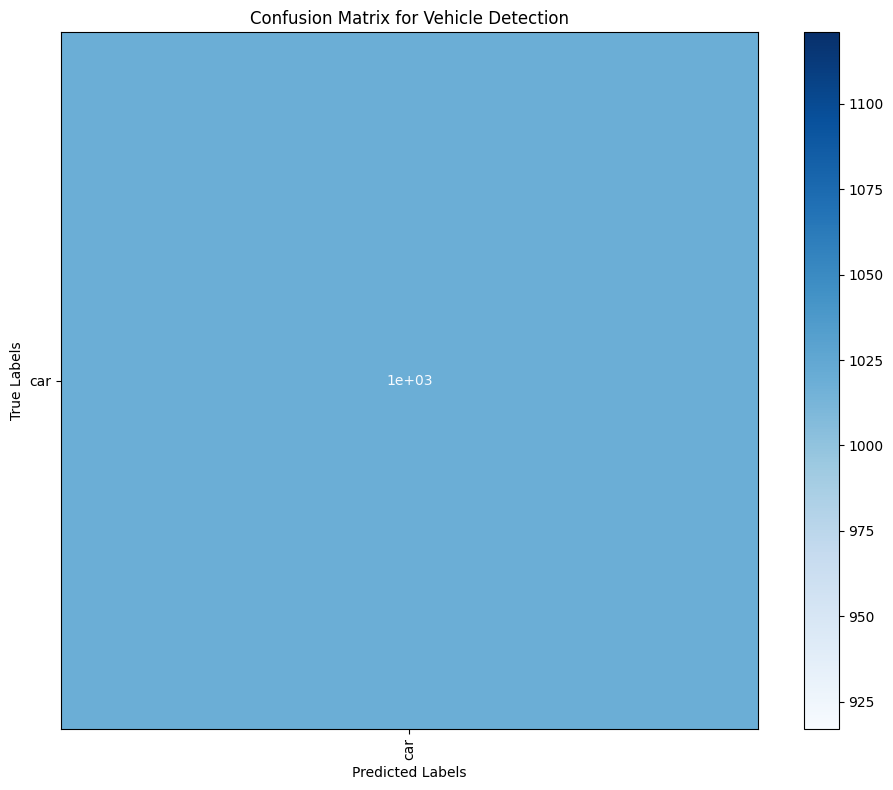

In [9]:
# Import the YOLODetectionEvaluator class
from models.detection.train_detection_eval import YOLODetectionEvaluator

# Set up evaluation parameters
class_names = ["car"]  # Update this list if you have more classes

# Use the same save_dir and yaml_path as before
# save_dir and yaml_path should be defined from previous cells
evaluator = YOLODetectionEvaluator(save_dir, yaml_path, class_names)
evaluator.evaluate()
evaluator.plot_confusion_matrix()